In [1]:
import pandas as pd
import numpy as np
import random
import seaborn as sns

### Missing data
Missing data occurs when values are simply absent or contain NaN (not a number) for any feature (column) in a given dataset. This will cause issues with many machine learning algorithms.

**Missing data can negatively impact:**
- Data visualization
- Arithmetic computations
- Machine learning algorithms

**Common methods to deal with missing data:**
- Remove rows or columns containing missing data
- Impute with mean or median
- Impute with mode (most frequently occuring feature)
- Impute with forward or backward fill
- Interpolate data between two points

*Note: Domain knowledge is often needed to decide how to fill nulls*

In [38]:
df = pd.DataFrame(np.random.randn(10, 4), columns=["A", "B", "C", "D"])
df = df[df > 0]
df

,A,B,C,D
0,2.430480,0.658588,NaN,NaN
1,NaN,2.053363,NaN,NaN
2,0.294160,NaN,0.226079,0.315585
3,NaN,NaN,0.477169,0.020915
4,0.223572,1.111105,NaN,1.506584
5,NaN,NaN,NaN,NaN
6,0.378172,NaN,NaN,0.083316
7,0.898787,1.769915,NaN,NaN
8,0.286868,NaN,NaN,0.125271
9,0.225985,1.398511,NaN,NaN


In [6]:
copy = df.copy()
copy.drop(columns="D", inplace=True)

## dropna
Remove rows (defualt), or columns, containing null

**Parameters**
- **how** = "any" (default), or "all"
- **thresh** = set number of (non-missing) values a row must contain in order to *not* drop
- **subset** only look for NaN in subset of columns (or rows)
- **axis** = "index" (default), or columns

In [11]:
copy.dropna(how="all")

,A,B,C
0,NaN,NaN,0.889163
1,NaN,1.088843,1.042385
2,0.835655,NaN,1.935368
3,2.105520,NaN,2.059007
4,NaN,NaN,0.808312
5,2.322129,NaN,1.115392
6,0.101379,0.193958,NaN
7,0.790666,NaN,NaN


## fillna
Fill missing values.

In [34]:
copy = df.copy()
copy["A"].fillna(copy["A"].median(), inplace=True)
# copy["B"].mode()[0] # Mainly for categorical data
copy["B"].ffill(inplace=True)
copy["D"].bfill(inplace=True)
copy["C"].interpolate(inplace=True)
copy

,A,B,C,D
0,1.323647,0.997163,0.181354,0.217223
1,0.809012,0.871737,0.240349,1.023240
2,0.809012,0.871737,0.299343,1.023240
3,1.223967,1.095367,0.358338,1.802197
4,0.784428,0.231629,0.417333,NaN
5,0.643520,1.582379,0.476328,NaN
6,0.809012,0.571984,2.316339,NaN
7,0.809012,0.571984,0.516670,NaN
8,0.809012,0.656618,0.516670,NaN
9,0.809012,1.157280,0.516670,NaN


c:\Users\first\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


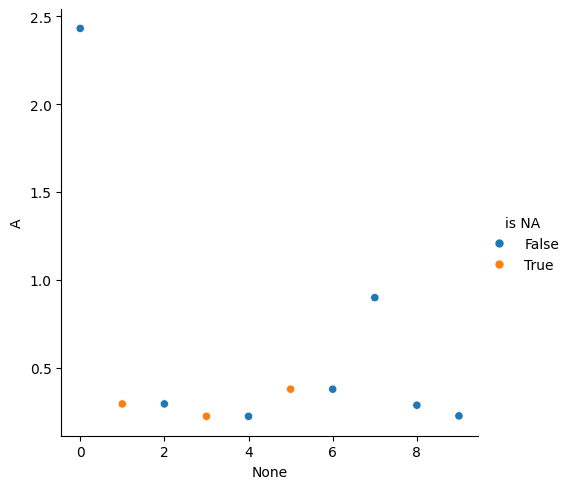

In [40]:
copy = df.copy()
copy["is NA"] = copy["A"].isna()
copy["A"].bfill(inplace=True)
sns.relplot(x=copy.index, y="A", hue="is NA", data=copy)